# Pet Adoption Speed Prediction Project

# Contents 
**1. Data Exploration**

**2. Data Visualisation**

**3. Modelling Factors Affecting Adoption Speed**

**4. Prediction**

**5. Future Analysis Extension**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading the data
data = pd.read_csv("/Users/aashrit/Documents/Masters/Apps/Mars/20220221 Graduate Data Science Case Study - Cohort 3/20220221_Graduate_Data_Scientist_UK_Case_Study_1.csv")

# 1. Data Exploration

In [3]:
#Exploring the first 5 rows of the data
data.head()

,PetID,RescuerID,Type,Name,Age,BreedName1,BreedName2,Gender,ColorName1,ColorName2,...,Dewormed,Sterilized,Health,Quantity,Fee,StateName,VideoAmt,PhotoAmt,Description,AdoptionSpeed
0,86e1089a3,8480853f516546f6cf33aa88cd76c379,Cat,Nibble,3,Tabby,NaN,Male,Black,White,...,2,2,1,1,100,Selangor,0,1,Nibble is a 3+ month old ball of cuteness. He ...,2
1,6296e909a,3082c7125d8fb66f7dd4bff4192c8b14,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,...,3,3,1,1,0,Kuala Lumpur,0,2,I just found it alone yesterday near my apartm...,0
2,3422e4906,fa90fa5b1ee11c86938398b60abc32cb,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,...,1,2,1,1,0,Selangor,0,7,Their pregnant mother was dumped by her irresp...,3
3,5842f1ff5,9238e4f44c71a75282e62f7136c6b240,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,...,1,2,1,1,150,Kuala Lumpur,0,8,"Good guard dog, very alert, active, obedience ...",2
4,850a43f90,95481e953f8aed9ec3d16fc4509537e8,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,...,2,2,1,1,0,Selangor,0,3,This handsome yet cute boy is up for adoption....,2


In [4]:
#Displaying the columns in the original data
data.columns

Index(['PetID', 'RescuerID', 'Type', 'Name', 'Age', 'BreedName1', 'BreedName2',
       'Gender', 'ColorName1', 'ColorName2', 'ColorName3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'StateName', 'VideoAmt', 'PhotoAmt', 'Description',
       'AdoptionSpeed'],
      dtype='object')

In [5]:
data.describe()
#There are 14,933 observations and 24 columns (features) in the data

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,0.056760,3.889215,2.516441
std,18.155790,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,0.346185,3.487810,1.177265
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000
75%,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000
max,255.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,8.000000,30.000000,4.000000


### **Describing the Data**

In [6]:
#A quick snapshot of a few features of the data
data.describe()
#We see some strange outliers, like max Age of 255, given that there are only Cats and Dogs in the data

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,0.056760,3.889215,2.516441
std,18.155790,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,0.346185,3.487810,1.177265
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000
75%,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000
max,255.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,8.000000,30.000000,4.000000


### **Investigating Missing Data**

In [7]:
# Missing data can often invalidate our analysis or make it more difficult, so
#it is important to know how significant its presence in the data is

print("Number of missing values in each column before cleaning:")
print(data.isnull().sum()) #Shows the total number of missing values in each column
print("\n")

missing_values = sum(data.isnull().sum())
total_values = np.product(data.shape)
missing_proportion = (missing_values/total_values) * 100
print("Proportion of missing values in the data before cleaning: " + 
      "{:.2f}".format(missing_proportion) + "% (2dp)")

# Before cleaning the data, the number of missing values as a proportion of 
#the whole dataset is only 7.53%, so in theory we don't need to worry about
#this too much - however, we should still look to deal with these where we can

Number of missing values in each column before cleaning:
PetID                0
RescuerID            0
Type                 0
Name              1257
Age                  0
BreedName1           5
BreedName2       10762
Gender               0
ColorName1           0
ColorName2        4471
ColorName3       10604
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee                  0
StateName            0
VideoAmt             0
PhotoAmt             0
Description         12
AdoptionSpeed        0
dtype: int64


Proportion of missing values in the data before cleaning: 7.53% (2dp)


### **Investigating Outliers**

From the data description above, we observed the presence of outliers mainly in the "Age" column, where the max age is 255. This doesn't seem to make sense when the dataset only consists in Cats and Dogs.

In [8]:
print("Types of animals in the data: ")
for animal_type in data['Type'].unique():
    print(animal_type)

Types of animals in the data: 
Cat
Dog


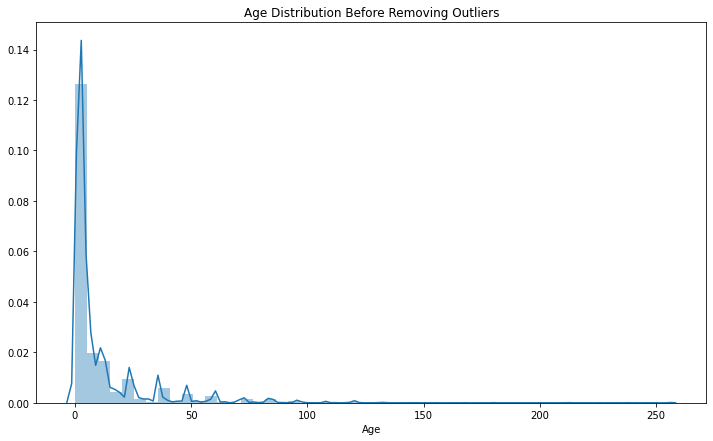

In [9]:
# Histogram displaying the distribution of ages in the data 
#prior to removing outliers
plt.figure(figsize=(12,7))
plt.title("Age Distribution Before Removing Outliers")
sns.distplot(a=data['Age'])
plt.show()

In [10]:
#Dealing with 'Age' outliers#
# The presence of outliers in the Age category are likely to interfere with our analysis later on

# According to the RSPCA, Dogs live for 13 years on average
#https://www.rspca.org.uk/adviceandwelfare/pets/dogs/health/seniordogs/lifespan

# According to Cats Protection, Cats live for 14 years on average 
#https://www.cats.org.uk/cats-blog/how-long-do-pet-cats-live

# Given that the average lifespan of each type of pet is around 15 years, let us suppose
#the upper age bound to be 30 years (i.e. 15 years either side of the mean of 15 years)

total_outliers = data[data['Age']>30].shape[0]
print("Number of outliers in the data: " + str(total_outliers))

outlier_proportion = (total_outliers/data.shape[0]) * 100
print("Proportion of observations with outliers in the data: " + "{:.2f}".format(outlier_proportion) + "% (2dp)")
# ~10% of the data is a significant chunk - therefore, unfortunately, I must drop these 
#observations so as to avoid jeopardising the validity of the analysis later on. 
#However, even after we drop these 1411 observations, we are still left with 13582 
#observations, which is a healthy sample size.

Number of outliers in the data: 1411
Proportion of observations with outliers in the data: 9.41% (2dp)


In [11]:
#Dropping outliers
data = data.loc[data["Age"] <= 30]
# Subsets the data where Age <= 30

#Dropping observations with "Not Sure" in the 'Vaccinated', 'Dewormed', and 'Sterilized' columns
data.drop(data[data['Vaccinated'] == 3].index, inplace=True)
data.drop(data[data['Dewormed'] == 3].index, inplace=True)
data.drop(data[data['Sterilized'] == 3].index, inplace=True)

data = data.reindex()
len(data)

#Re-indexing the dataframe after dropping observations
data = data.reindex()

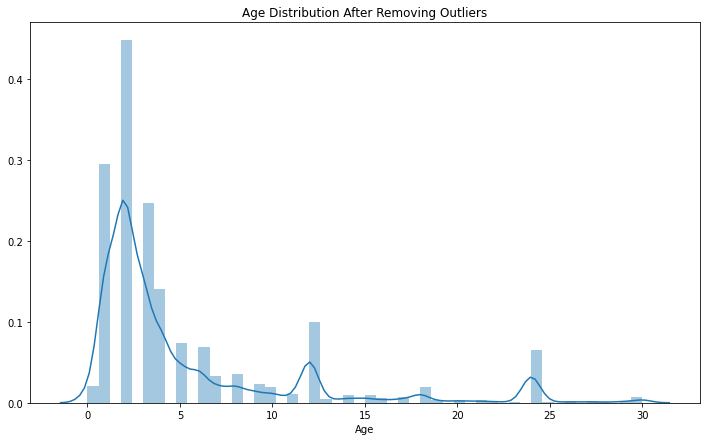

In [12]:
# Histogram displaying the distribution of ages in the data 
#after removing outliers
plt.figure(figsize=(12,7))
plt.title("Age Distribution After Removing Outliers")
sns.distplot(a=data['Age'])
plt.show()

### **Feature Addition/Manipulation**

***New 'Named?' Variable***

In [13]:
#Creates a new categorical column "Named?"#
# Allows us to use this as an input in our analysis later on

#Dealing with missing values in "Name" column
data['Name'] = data[['Name']].fillna("No Name Yet")

#True if pet has a name, False if not
data['Named?'] = np.where(data['Name'] != "No Name Yet", True, False)

***New 'AdoptionSpeed_Dummy' Variable***

In [14]:
#Creates a new (binary) categorical column "AdoptionSpeed_Dummy"#
# Allows for binary classification later on

#1 if pet was adopted within 1 month, 0 if not
data['AdoptionSpeed_Dummy'] = np.where(data['AdoptionSpeed'] <=2, 1, 0)

***New 'DescriptionCount' Variable***

In [15]:
#Creating DescriptionCount Column#
# Here I create a column representing the length of the Descriptions provided (no. of words) 
#for use in analysis later as the description is likely to have an impact on adoption

#Dealing with missing values - Fill with "N/A"
data['Description'] = data[['Description']].fillna("N/A")

#Appending all description lengths to a list
description_lengths = []
for i in range(len(data)):
    description_lengths.append(len(data.iloc[i]['Description'].split()))
    
#Adding the list as a new column
data['DescriptionCount'] = description_lengths

# Making sure that those with missing values have DescriptionCount of 0, instead of 1
#Last term just maintains current value of the column if "Description" is not "N/A"
data['DescriptionCount'] = np.where(data['Description'] == "N/A", 0, data['DescriptionCount'])

***New 'Gender_Dummy' Variable***

In [16]:
#Creating Gender_Dummy Column#
# Allows us to use this as an input in our analysis later on
#1 if Female, 0 if Male

data['Gender_Dummy'] = np.where(data['Gender'] == "Female", 1, 0)

***New 'Type_Dummy' Variable***

In [17]:
#Creating Type_Dummy Column#
# Allows us to use this as an input in our analysis later on
#1 if Dog, 0 if Cat

data['Type_Dummy'] = np.where(data['Type'] == "Dog", 1, 0)

***Re-formulating 'Health' Variable (Creating Health_Dummy)***

In [18]:
# I do this in order to recode the categories for use in our analysis later

# Currently 1 = Healthy, 2 = Minor injury, 3 = Serious injury, 0 = Not specified
# Change to 1 = Healthy, 0 = Not Healthy (Minor or Serious Injury) - ignores "Not Specified" as there are none 
#in the dataset set (see below)
print("No. Not Specified: " + str(len(data[data['Health'] == 0])))
print("No. Healthy: " + str(len(data[data['Health'] == 1])))
print("No. Minor Injury: " + str(len(data[data['Health'] == 2])))
print("No. Serious Injury: " + str(len(data[data['Health'] == 3])))

data['Health_Dummy'] = np.where(data['Health'] == 3, 0, data['Health'])
data['Health_Dummy'] = np.where(data['Health'] == 2, 0, data['Health_Dummy'])

#Checking that there has been no change in the number in each category
print(" ")
print("No. Healthy: " + str(len(data[data['Health_Dummy']== 1])))
print("No. Not Healthy: " + str(len(data[data['Health_Dummy']== 0])))

No. Not Specified: 0
No. Healthy: 10997
No. Minor Injury: 257
No. Serious Injury: 14
 
No. Healthy: 10997
No. Not Healthy: 271


In [19]:
print(data[['Health','Health_Dummy']][(data["Health"]==1) & (data["Health_Dummy"]!=1)])
print(data[['Health','Health_Dummy']][(data["Health"]==2) & (data["Health_Dummy"]!=0)])
print(data[['Health','Health_Dummy']][(data["Health"]==3) & (data["Health_Dummy"]!=0)])

#Checking all changes have been correctly made

Empty DataFrame
Columns: [Health, Health_Dummy]
Index: []
Empty DataFrame
Columns: [Health, Health_Dummy]
Index: []
Empty DataFrame
Columns: [Health, Health_Dummy]
Index: []


***Re-formulating 'Vaccinated' Variable (Creating Vaccinated_Dummy)***

In [20]:
# I do this in order to recode the categories in an ordinal fashion - 
#prospective pet parents are likely to prefer animals that are already vaccinated
# Currently 1 = Yes, 2 = No, 3 = Not Sure
# Change to 1 = Yes, 0 = No
print("No. 'Not Sure': " + str(len(data[data['Vaccinated'] == 3])))

data['Vaccinated_Dummy'] = np.where(data['Vaccinated'] == 2, 0, data['Vaccinated'])

No. 'Not Sure': 0


In [21]:
print(data[['Vaccinated','Vaccinated_Dummy']][(data["Vaccinated"]==1) & (data["Vaccinated_Dummy"]!=1)])
print(data[['Vaccinated','Vaccinated_Dummy']][(data["Vaccinated"]==2) & (data["Vaccinated_Dummy"]!=0)])

#Checking all changes have been correctly made

Empty DataFrame
Columns: [Vaccinated, Vaccinated_Dummy]
Index: []
Empty DataFrame
Columns: [Vaccinated, Vaccinated_Dummy]
Index: []


***Re-formulating 'Dewormed' Variable (Creating Dewormed_Dummy)***

In [22]:
# I do this in order to recode the categories in an ordinal fashion - 
#prospective pet parents are likely to prefer animals that are already dewormed
# Currently 1 = Yes, 2 = No, 3 = Not Sure
# Change to 1 = Yes, 0 = Not Sure, -1 = No
print("No. 'Not Sure': " + str(len(data[data['Dewormed'] == 3])))


data['Dewormed_Dummy'] = np.where(data['Dewormed'] == 2, 0, data['Dewormed'])

No. 'Not Sure': 0


In [23]:
print(data[['Dewormed','Dewormed_Dummy']][(data["Dewormed"]==1) & (data["Dewormed_Dummy"]!=1)])
print(data[['Dewormed','Dewormed_Dummy']][(data["Dewormed"]==2) & (data["Dewormed_Dummy"]!=0)])

#Checking all changes have been correctly made

Empty DataFrame
Columns: [Dewormed, Dewormed_Dummy]
Index: []
Empty DataFrame
Columns: [Dewormed, Dewormed_Dummy]
Index: []


***Re-formulating 'Sterilized' Variable (Creating Sterilized_Dummy)***

In [24]:
# I do this in order to recode the categories in an ordinal fashion
# Currently 1 = Yes, 2 = No, 3 = Not Sure
# Change to 1 = Yes, 0 = Not Sure, -1 = No
print("No. 'Not Sure': " + str(len(data[data['Sterilized'] == 3])))


data['Sterilized_Dummy'] = np.where(data['Sterilized'] == 2, 0, data['Sterilized'])

No. 'Not Sure': 0


In [25]:
print(data[['Sterilized','Sterilized_Dummy']][(data["Sterilized"]==1) & (data["Sterilized_Dummy"]!=1)])
print(data[['Sterilized','Sterilized_Dummy']][(data["Sterilized"]==2) & (data["Sterilized_Dummy"]!=0)])

#Checking all changes have been correctly made

Empty DataFrame
Columns: [Sterilized, Sterilized_Dummy]
Index: []
Empty DataFrame
Columns: [Sterilized, Sterilized_Dummy]
Index: []


### Checking Final Data Form

***Missing Values***

In [26]:
print("Number of missing values in each column after cleaning:")
print(data.isnull().sum())
print("\n")

missing_values = sum(data.isnull().sum())
total_values = np.product(data.shape)
missing_proportion = (missing_values/total_values) * 100
print("Proportion of missing values in the data after cleaning: " + 
      "{:.2f}".format(missing_proportion) + "% (2dp)")
# After cleaning, the number of missing values as a proportion of 
#the whole dataset has gone down to 7.29% 

Number of missing values in each column after cleaning:
PetID                     0
RescuerID                 0
Type                      0
Name                      0
Age                       0
BreedName1                4
BreedName2             8061
Gender                    0
ColorName1                0
ColorName2             3229
ColorName3             7882
MaturitySize              0
FurLength                 0
Vaccinated                0
Dewormed                  0
Sterilized                0
Health                    0
Quantity                  0
Fee                       0
StateName                 0
VideoAmt                  0
PhotoAmt                  0
Description               0
AdoptionSpeed             0
Named?                    0
AdoptionSpeed_Dummy       0
DescriptionCount          0
Gender_Dummy              0
Type_Dummy                0
Health_Dummy              0
Vaccinated_Dummy          0
Dewormed_Dummy            0
Sterilized_Dummy          0
dtype: int64


Propo

***Final Shape***

In [27]:
data.shape

(11268, 33)

***Final Columns***

In [28]:
data.columns

Index(['PetID', 'RescuerID', 'Type', 'Name', 'Age', 'BreedName1', 'BreedName2',
       'Gender', 'ColorName1', 'ColorName2', 'ColorName3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'StateName', 'VideoAmt', 'PhotoAmt', 'Description',
       'AdoptionSpeed', 'Named?', 'AdoptionSpeed_Dummy', 'DescriptionCount',
       'Gender_Dummy', 'Type_Dummy', 'Health_Dummy', 'Vaccinated_Dummy',
       'Dewormed_Dummy', 'Sterilized_Dummy'],
      dtype='object')

In [29]:
data.describe()

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,AdoptionSpeed_Dummy,DescriptionCount,Gender_Dummy,Type_Dummy,Health_Dummy,Vaccinated_Dummy,Dewormed_Dummy,Sterilized_Dummy
count,11268.000000,11268.000000,11268.000000,11268.00000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.000000,11268.00000,11268.000000,11268.000000
mean,5.233227,1.848509,1.429446,1.59842,1.400426,1.806621,1.025293,1.598953,19.892794,0.064874,4.128417,2.463348,0.523252,62.609869,0.487487,0.501154,0.975950,0.40158,0.599574,0.193379
std,5.988533,0.519300,0.572506,0.49024,0.490006,0.394965,0.164744,1.438255,70.454194,0.372763,3.696472,1.157970,0.499481,69.364748,0.499866,0.500021,0.153212,0.49024,0.490006,0.394965
min,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,2.00000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,44.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000
75%,6.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
max,30.000000,4.000000,3.000000,2.00000,2.000000,2.000000,3.000000,20.000000,1000.000000,8.000000,30.000000,4.000000,1.000000,1257.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [30]:
#Final data form
data.head()

,PetID,RescuerID,Type,Name,Age,BreedName1,BreedName2,Gender,ColorName1,ColorName2,...,AdoptionSpeed,Named?,AdoptionSpeed_Dummy,DescriptionCount,Gender_Dummy,Type_Dummy,Health_Dummy,Vaccinated_Dummy,Dewormed_Dummy,Sterilized_Dummy
0,86e1089a3,8480853f516546f6cf33aa88cd76c379,Cat,Nibble,3,Tabby,NaN,Male,Black,White,...,2,True,1,69,0,0,1,0,0,0
2,3422e4906,fa90fa5b1ee11c86938398b60abc32cb,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,...,3,True,0,69,0,1,1,1,1,0
3,5842f1ff5,9238e4f44c71a75282e62f7136c6b240,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,...,2,True,1,25,1,1,1,1,1,0
4,850a43f90,95481e953f8aed9ec3d16fc4509537e8,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,...,2,True,1,81,0,1,1,0,0,0
5,d24c30b4b,22fe332bf9c924d4718005891c63fbed,Cat,No Name Yet,3,Domestic Short Hair,NaN,Female,Cream,Gray,...,2,False,1,18,1,0,1,0,0,0


# 2. Data Visualisation

Here I visualise the means of a select range of features in the context of both AdoptionSpeed and the newly created AdoptionSpeed_Dummy

### AdoptionSpeed

In [31]:
speeds = [0,1,2,3,4]

AdoptionSpeedStats = data.groupby("AdoptionSpeed").mean()
AdoptionSpeedStats

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,Named?,AdoptionSpeed_Dummy,DescriptionCount,Gender_Dummy,Type_Dummy,Health_Dummy,Vaccinated_Dummy,Dewormed_Dummy,Sterilized_Dummy
AdoptionSpeed,,,,,,,,,,,,,,,,,,,,
0,5.825342,1.791096,1.630137,1.640411,1.465753,1.845890,1.037671,1.452055,22.565068,0.054795,3.404110,0.934932,1.0,56.482877,0.503425,0.366438,0.965753,0.359589,0.534247,0.154110
1,4.080512,1.805120,1.500000,1.696532,1.468621,1.900908,1.023121,1.477291,20.757225,0.050372,3.922791,0.910818,1.0,62.088357,0.433113,0.423204,0.977704,0.303468,0.531379,0.099092
2,4.218730,1.856380,1.431175,1.632307,1.407605,1.857951,1.019799,1.594909,19.749214,0.071339,4.265871,0.923633,1.0,63.246386,0.475801,0.493715,0.980830,0.367693,0.592395,0.142049
3,5.114819,1.880016,1.398888,1.547874,1.342868,1.792610,1.025824,1.577672,18.231228,0.083433,4.924513,0.932062,0.0,68.715137,0.519269,0.555026,0.975368,0.452126,0.657132,0.207390
4,7.385639,1.854641,1.374081,1.517688,1.378634,1.677758,1.031524,1.740455,20.511033,0.054641,3.521891,0.906130,0.0,57.587040,0.516988,0.541856,0.970578,0.482312,0.621366,0.322242


In [32]:
#Template
#plt.figure(figsize=(15,6))
#plt.title()
#plt.xlabel()
#plt.ylabel()
#sns.lineplot()
#plt.show()

***Age***

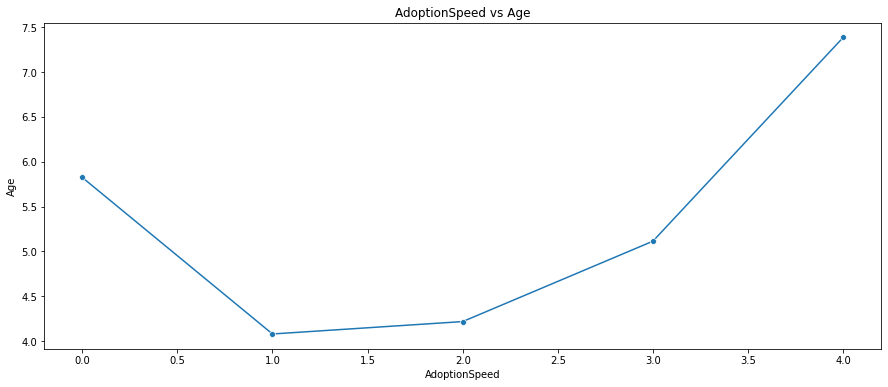

In [33]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed vs Age")
plt.xlabel("AdoptionSpeed")
sns.lineplot(speeds,AdoptionSpeedStats['Age'],marker="o")
plt.show()

#Pets adopted within shorter time frames are of a medium age, on average - 
#possibly because people view younger pets as harder to train. We then observe 
#that pets adopted within longer timeframes are older, on average.

***Maturity Size***

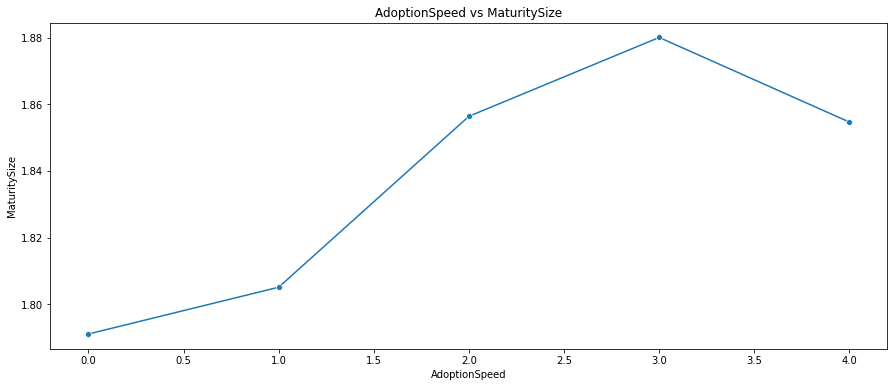

In [34]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed vs MaturitySize")
plt.xlabel("AdoptionSpeed")
sns.lineplot(speeds,AdoptionSpeedStats['MaturitySize'],marker="o")
plt.show()

#Pets adopted within shorter time frames are more likely to have a 
#smaller maturity size , on average.

***Vaccinated***

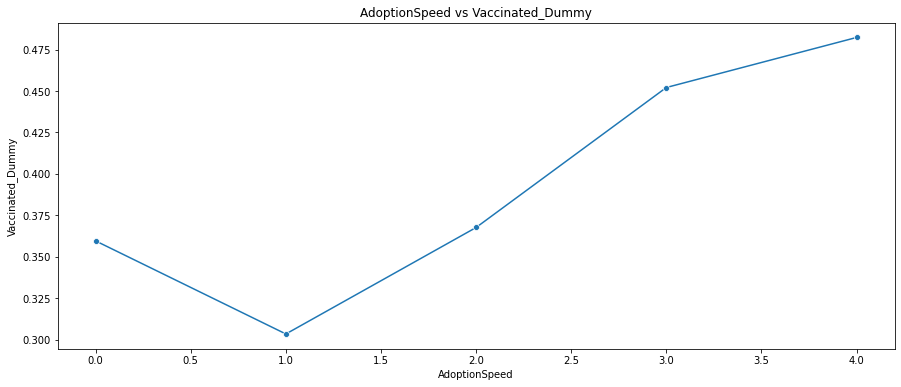

In [35]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed vs Vaccinated_Dummy")
plt.xlabel("AdoptionSpeed")
sns.lineplot(speeds,AdoptionSpeedStats['Vaccinated_Dummy'],marker="o")
plt.show()

#Pets adopted within shorter time frames are more likely to not be vaccinated,
#on average.

***Quantity***

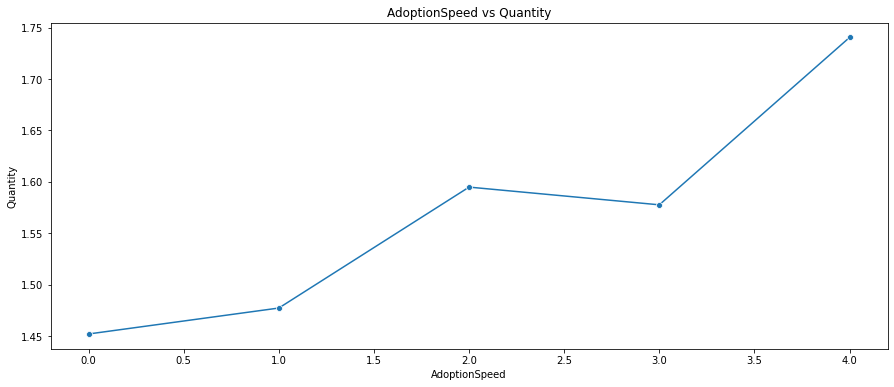

In [36]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed vs Quantity")
plt.xlabel("AdoptionSpeed")
sns.lineplot(speeds,AdoptionSpeedStats['Quantity'],marker="o")
plt.show()

#Pets adopted within shorter time frames are from listings with a smaller quantity,
#on average.

***Fee***

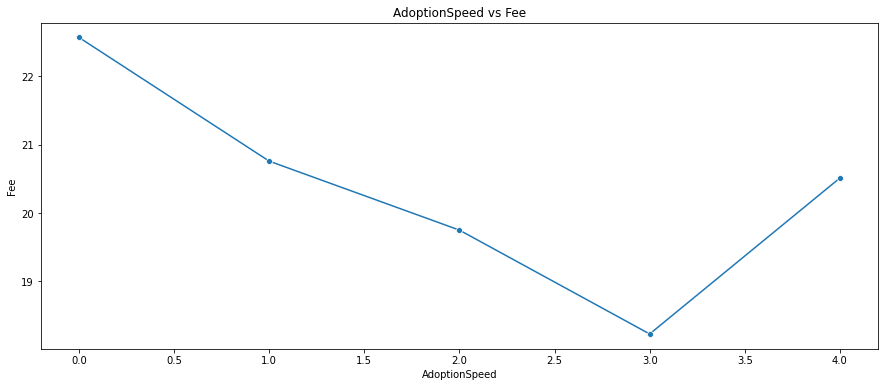

In [37]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed vs Fee")
plt.xlabel("AdoptionSpeed")
sns.lineplot(speeds,AdoptionSpeedStats['Fee'],marker="o")
plt.show()

#Pets adopted within shorter time frames commend a higher fee, on average.

### AdoptionSpeed_Dummy

In [38]:
dummy_speeds = [0,1]

AdoptionSpeed_Dummy_Stats = data.groupby("AdoptionSpeed_Dummy").mean()
AdoptionSpeed_Dummy_Stats

#NB AdoptionSpeed_Dummy interpretation:
#1 - Adopted within 1 month
#0 - Not adopted within 1 month

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,Named?,DescriptionCount,Gender_Dummy,Type_Dummy,Health_Dummy,Vaccinated_Dummy,Dewormed_Dummy,Sterilized_Dummy
AdoptionSpeed_Dummy,,,,,,,,,,,,,,,,,,,,
0,6.321668,1.86653,1.385704,1.531832,1.361876,1.731571,1.028853,1.664185,19.442852,0.068131,4.179077,3.531459,0.918280,62.801005,0.518057,0.548027,0.972822,0.468168,0.638124,0.268429
1,4.241520,1.83209,1.469301,1.659091,1.435550,1.875000,1.022049,1.539518,20.302748,0.061906,4.082259,1.490163,0.918928,62.435719,0.459634,0.458446,0.978799,0.340909,0.564450,0.125000


***Age***

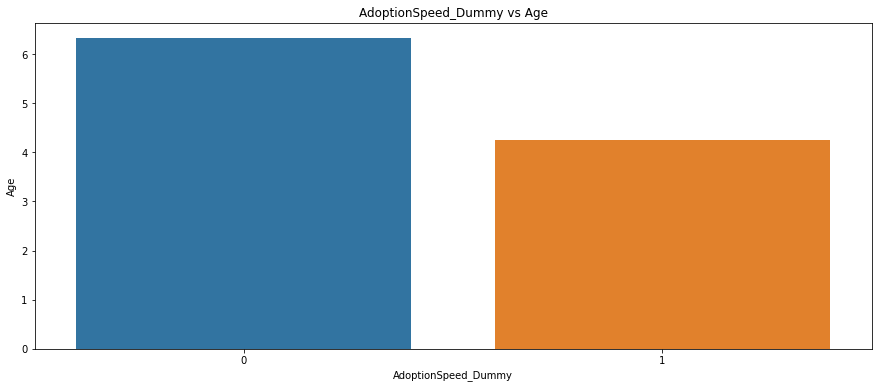

In [39]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed_Dummy vs Age")
plt.xlabel("AdoptionSpeed_Dummy")
sns.barplot(dummy_speeds,AdoptionSpeed_Dummy_Stats['Age'])
plt.show()

#Pets adopted within 1 month are younger, on average

***Maturity Size***

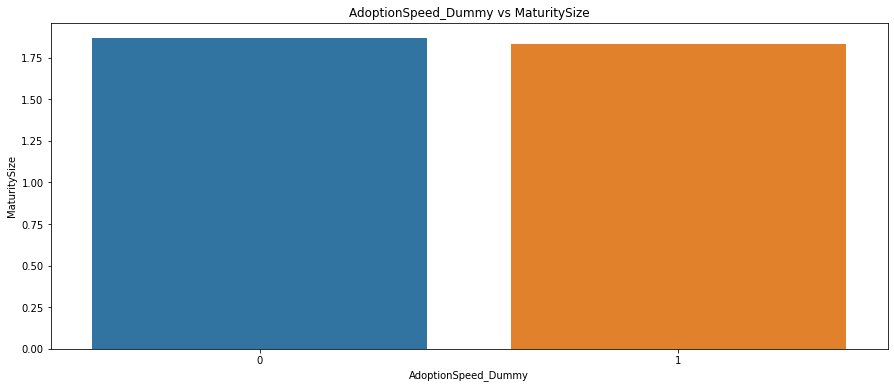

In [40]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed_Dummy vs MaturitySize")
plt.xlabel("AdoptionSpeed_Dummy")
sns.barplot(dummy_speeds,AdoptionSpeed_Dummy_Stats['MaturitySize'])
plt.show()

#We observe little difference in the maturity size, on average

***Vaccinated_Dummy***

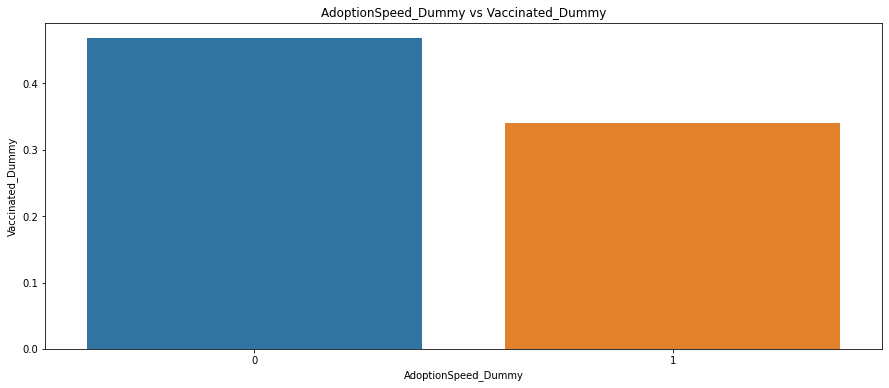

In [41]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed_Dummy vs Vaccinated_Dummy")
plt.xlabel("AdoptionSpeed_Dummy")
sns.barplot(dummy_speeds,AdoptionSpeed_Dummy_Stats['Vaccinated_Dummy'])
plt.show()

#On average, pets adopted within 1 month are less likely to be vaccinated.
#This is possibly due to the fact that pets adopted within 1 month are
#younger than those not adopted within 1 month, as demonstrated above, and 
#so may not have been vaccinated yet. 

***Quantity***

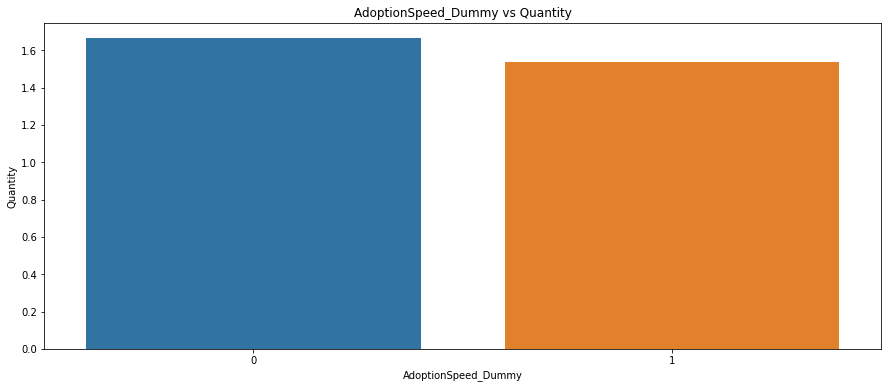

In [42]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed_Dummy vs Quantity")
plt.xlabel("AdoptionSpeed_Dummy")
sns.barplot(dummy_speeds,AdoptionSpeed_Dummy_Stats['Quantity'])
plt.show()

#There is a slight difference in the average quantity of pets adopted.

***Fee***

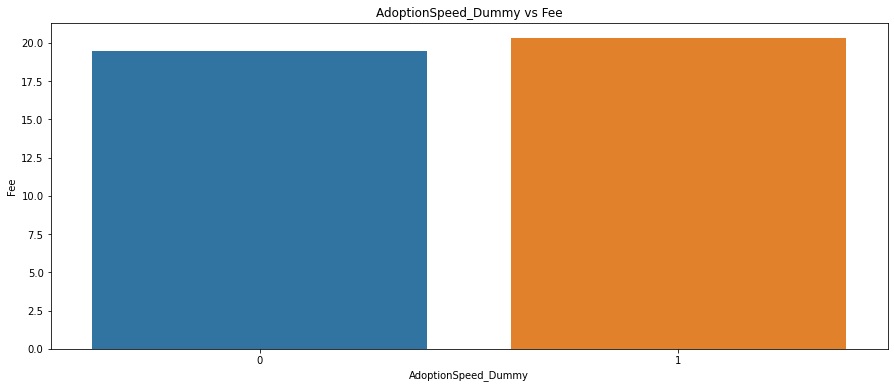

In [43]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed_Dummy vs Fee")
plt.xlabel("AdoptionSpeed_Dummy")
sns.barplot(dummy_speeds,AdoptionSpeed_Dummy_Stats['Fee'])
plt.show()

#Surprisingly, pets adopted within 1 month are likely to command a higher fee,
#on average.

***Type_Dummy***

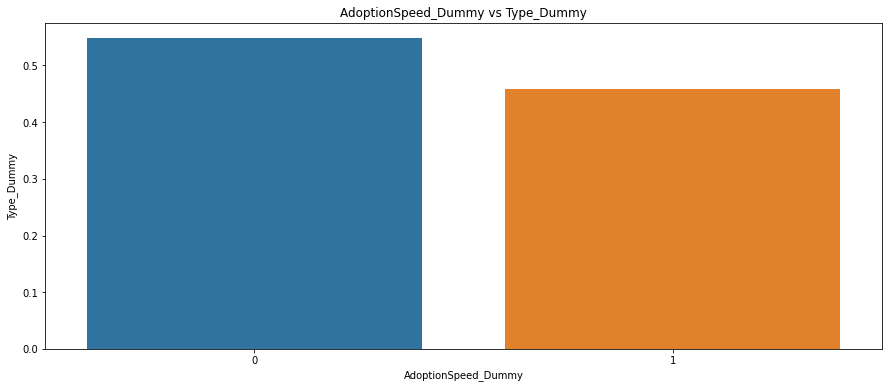

In [44]:
plt.figure(figsize=(15,6))
plt.title("AdoptionSpeed_Dummy vs Type_Dummy")
plt.xlabel("AdoptionSpeed_Dummy")
sns.barplot(dummy_speeds,AdoptionSpeed_Dummy_Stats['Type_Dummy'])
plt.show()

#On average, pets adopted within 1 month are more likely to be cats (Type = 0)
#than dogs (Type = 1).

# 3. Assessing Factors Affecting Adoption Speed

### Logistic Regression

***Organising the data for Logistic Regression***

In [45]:
LR_features = ['Age','MaturitySize','FurLength','Quantity','Fee','VideoAmt','PhotoAmt',
               'Named?','Gender_Dummy','Type_Dummy','Health_Dummy','Vaccinated_Dummy','Dewormed_Dummy',
               'Sterilized_Dummy']
# I do not use PetID, RescuerID, BreedName, ColorName, StateName.
#They either not informative or contain too many categories 
#(e.g. 149 BreedName1s - excluded to maintain simplicity of the 
#model and due to time constraint).


#Creating the input variable in the appropriate structure for the LogisticRegression() method
X_LR = list(zip(data['Age'],data['MaturitySize'],data['FurLength'],data['Quantity'],data['Fee'],
             data['VideoAmt'],data['PhotoAmt'],data['Named?'],
                  data['Gender_Dummy'],data['Type_Dummy'],data['Health_Dummy'],data['Vaccinated_Dummy'],
                  data['Dewormed_Dummy'],data['Sterilized_Dummy']))

#Creating the output variable
y_LR = data['AdoptionSpeed_Dummy']

In [46]:
len(data['BreedName1'].unique())

149

In [47]:
#Function to determine the p-values for each coefficient#
# Sklearn does not natively support this functionality
#I use this function as I was unable to import 'statsmodels'
#Reference:
#https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance

from scipy.stats import norm

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

***Implementing the Logistic Regression***

In [48]:
from sklearn.linear_model import LogisticRegression

#Building and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_LR,y_LR)
model.coef_

p_vals = list(logit_pvalue(model,X_LR))

coefficients = {}

print("Coefficients and Statistical Significance:")
print("")

for i in range(len(LR_features)):
    coefficients[LR_features[i]] = ["Coefficient",model.coef_[0][i],"p-value: ",p_vals[i]]
    if 0.01 <= coefficients[LR_features[i]][3] < 0.05: #Statistically significant at 5%
        print(LR_features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[LR_features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i])+" *")
    elif 0.005 < coefficients[LR_features[i]][3] < 0.01: #Statistically significant at 1%
        print(LR_features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[LR_features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i])+" **")
    elif coefficients[LR_features[i]][3] <= 0.005: #Statistically significant at 0.5%
        print(LR_features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[LR_features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i])+" ***")
    else:
        print(LR_features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[LR_features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i]))

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients and Statistical Significance:

Age - Coefficient: -0.05, p-value: 0.428
MaturitySize - Coefficient: 0.01, p-value: 0.000 ***
FurLength - Coefficient: 0.28, p-value: 0.865
Quantity - Coefficient: -0.13, p-value: 0.000 ***
Fee - Coefficient: 0.00, p-value: 0.000 ***
VideoAmt - Coefficient: -0.02, p-value: 0.043 *
PhotoAmt - Coefficient: -0.01, p-value: 0.703
Named? - Coefficient: 0.11, p-value: 0.280
Gender_Dummy - Coefficient: -0.23, p-value: 0.116
Type_Dummy - Coefficient: -0.29, p-value: 0.000 ***
Health_Dummy - Coefficient: 0.34, p-value: 0.000 ***
Vaccinated_Dummy - Coefficient: -0.22, p-value: 0.007 **
Dewormed_Dummy - Coefficient: 0.05, p-value: 0.000 ***
Sterilized_Dummy - Coefficient: -0.53, p-value: 0.387


***Determining odds multipliers***

In [49]:
import math

coefficients_odds = coefficients

for i in coefficients_odds:
    coefficients_odds[i][1] =  math.exp(coefficients[i][1])
    #We take the exponential of the log odds to find the odds multiplier
    print(i + " odds multiplier: " + "{:.2f}".format(coefficients_odds[i][1]))

Age odds multiplier: 0.95
MaturitySize odds multiplier: 1.01
FurLength odds multiplier: 1.32
Quantity odds multiplier: 0.87
Fee odds multiplier: 1.00
VideoAmt odds multiplier: 0.98
PhotoAmt odds multiplier: 0.99
Named? odds multiplier: 1.12
Gender_Dummy odds multiplier: 0.79
Type_Dummy odds multiplier: 0.75
Health_Dummy odds multiplier: 1.41
Vaccinated_Dummy odds multiplier: 0.80
Dewormed_Dummy odds multiplier: 1.05
Sterilized_Dummy odds multiplier: 0.59


In [50]:
#Checks the split between Cats and Dogs in teh data
data['Type'].value_counts()

Dog    5647
Cat    5621
Name: Type, dtype: int64

# 4. Prediction

### **Class Balance Inspection**

In [51]:
#Here I inspect the balance between the two classes in the data. We observe an almost exact
#50/50 split in the classes, therefore class imbalance is not an issue.
class_0 = data['AdoptionSpeed_Dummy'].value_counts()[0]
class_1 = data['AdoptionSpeed_Dummy'].value_counts()[1]

class_0_share = (class_0/data.shape[0])*100
class_1_share = (class_1/data.shape[0])*100

class_shares = [class_0_share,class_1_share]

for share in class_shares:
    print("Class " + str(class_shares.index(share)) + ": " + "{:.2f}".format(share) + "%")

Class 0: 47.67%
Class 1: 52.33%


### **Logistic Model**

In [52]:
from sklearn.model_selection import train_test_split
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y_LR, test_size=0.25, random_state=42)

In [53]:
model = LogisticRegression()
model.fit(X_train_LR,y_train_LR)
pred = model.predict(X_train_LR)

misclassifications = sum((y_train_LR - pred)**2)
total_predictions = len(pred)
total_predictions
accuracy = 100 - ((misclassifications/total_predictions) * 100)

print("Training Accuracy: " + "{:.2f}".format(accuracy) + "% (2dp)")

Training Accuracy: 61.34% (2dp)


/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
pred = model.predict(X_test_LR)

misclassifications = sum((y_test_LR - pred)**2)
total_predictions = len(pred)
total_predictions
accuracy = 100 - ((misclassifications/total_predictions) * 100)

print("Test Accuracy: " + "{:.2f}".format(accuracy) + "% (2dp)")

Test Accuracy: 61.80% (2dp)


### KNN

***Building the Model***

In [55]:
data.columns

Index(['PetID', 'RescuerID', 'Type', 'Name', 'Age', 'BreedName1', 'BreedName2',
       'Gender', 'ColorName1', 'ColorName2', 'ColorName3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'StateName', 'VideoAmt', 'PhotoAmt', 'Description',
       'AdoptionSpeed', 'Named?', 'AdoptionSpeed_Dummy', 'DescriptionCount',
       'Gender_Dummy', 'Type_Dummy', 'Health_Dummy', 'Vaccinated_Dummy',
       'Dewormed_Dummy', 'Sterilized_Dummy'],
      dtype='object')

In [56]:
knn_features = ['AdoptionSpeed_Dummy',"Age",'MaturitySize','FurLength',"Quantity","Fee",
                "VideoAmt","PhotoAmt","Named?",'Gender_Dummy','Type_Dummy',"Health_Dummy",
                "Vaccinated_Dummy","Dewormed_Dummy","Sterilized_Dummy"]

knn_data = data[knn_features]

knn_data

,AdoptionSpeed_Dummy,Age,MaturitySize,FurLength,Quantity,Fee,VideoAmt,PhotoAmt,Named?,Gender_Dummy,Type_Dummy,Health_Dummy,Vaccinated_Dummy,Dewormed_Dummy,Sterilized_Dummy
0,1,3,1,1,1,100,0,1,True,0,0,1,0,0,0
2,0,1,2,2,1,0,0,7,True,0,1,1,1,1,0
3,1,4,2,1,1,150,0,8,True,1,1,1,1,1,0
4,1,1,2,1,1,0,0,3,True,0,1,1,0,0,0
5,1,3,2,1,1,0,0,2,False,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,0,1,2,1,1,0,0,1,True,1,0,1,0,1,0
14987,1,6,1,3,1,0,0,1,True,1,1,1,1,1,0
14988,1,2,2,2,4,0,0,3,False,0,0,1,0,0,0
14991,0,9,1,1,1,0,0,3,True,1,0,1,1,1,1


In [57]:
#AdoptionSpeed_Dummy is our new classification variable
y_knn = knn_data['AdoptionSpeed_Dummy']
X_features = [i for i in knn_features[1:]]
X_knn = knn_data[X_features]

In [58]:
#Splitting the data into Training and Testing data#
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.25, random_state=42)

***Determining Optimum Number of Neighbours***

In [59]:
#Here I use cross validation to determine the optimum number of neighbours to
#use in my KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

test_ns = [1,10,25,50,75,100,500,1000,1500]
scores = []

for n in test_ns:
    knn = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(knn,X_train_knn,y_train_knn,cv=5)
    scores.append(score.mean())
    
cv_results = {}
for i in range(len(test_ns)):
    cv_results[test_ns[i]] = scores[i]
    
print("5-Fold Cross-validation Results:")
cv_results

#Given our cross-validation results, the optimal number of neighbors to use is 75

5-Fold Cross-validation Results:


{1: 0.559816851483139,
 10: 0.5938949327977212,
 25: 0.6046624839473859,
 50: 0.6111714296711794,
 75: 0.6127101011620868,
 100: 0.6097511013755386,
 500: 0.5922387579213308,
 1000: 0.5957879340329415,
 1500: 0.5940120162783129}

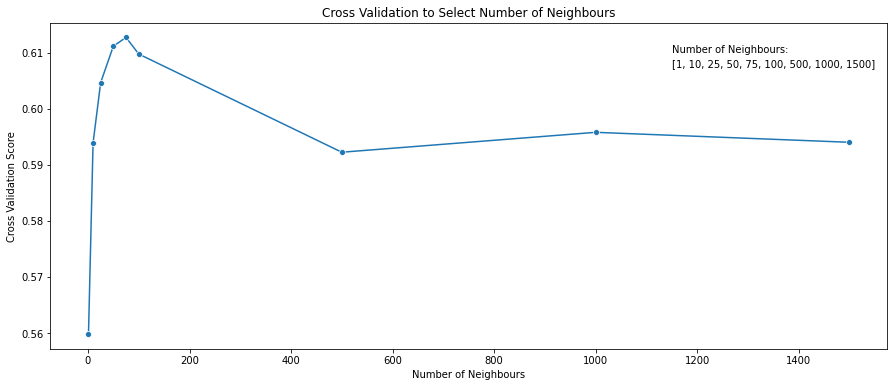

In [60]:
plt.figure(figsize=(15,6))
sns.lineplot(cv_results.keys(),cv_results.values(),marker="o")
plt.title("Cross Validation to Select Number of Neighbours")
plt.xlabel("Number of Neighbours")
plt.ylabel("Cross Validation Score")
plt.text(1150,0.61,"Number of Neighbours:")
plt.text(1150,0.6075,test_ns)
plt.show()

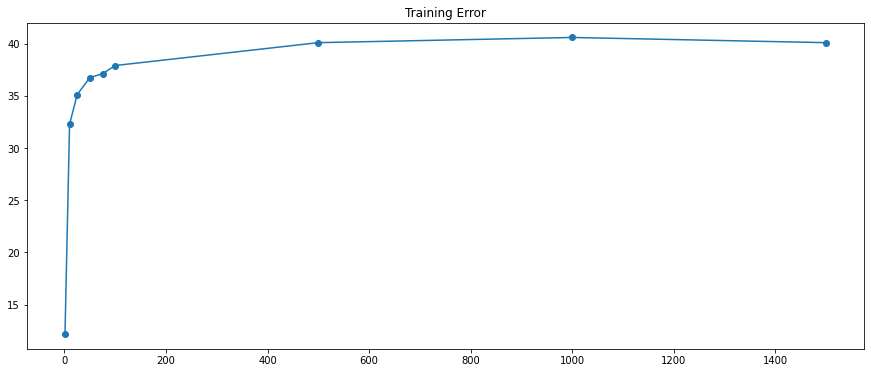

In [61]:
#Cross-Checking with Training Error#
train_errors = []

for neighbor in test_ns:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_knn,y_train_knn)
    pred = knn.predict(X_train_knn)
    
    misclassifications = sum((y_train_knn - pred)**2)
    total_predictions = len(pred)
    train_error = (misclassifications/total_predictions) * 100
    train_errors.append(train_error)
    
plt.figure(figsize=(15,6))
plt.title("Training Error")
plt.plot(test_ns,train_errors,marker="o")
plt.show()


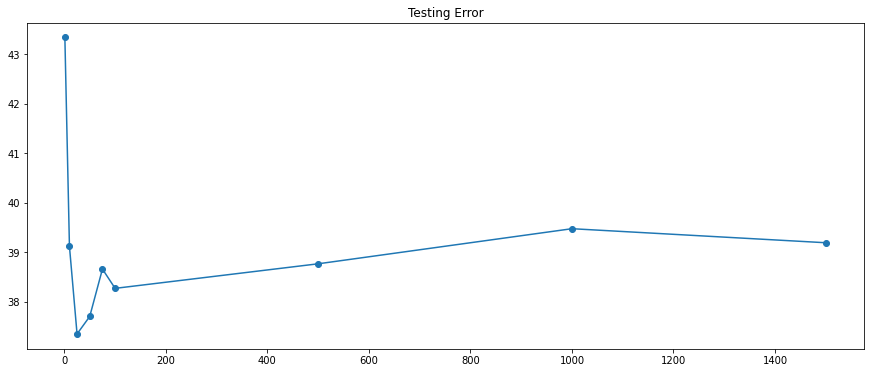

In [62]:
#Cross-Checking with Test Error#
test_errors = []

for neighbor in test_ns:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_knn,y_train_knn)
    pred = knn.predict(X_test_knn)
    
    misclassifications = sum((y_test_knn - pred)**2)
    total_predictions = len(pred)
    #error = ((misclassifications/total_predictions) * 100)
    #accuracies.append(accuracy)
    test_error = (misclassifications/total_predictions) * 100
    test_errors.append(test_error)
    
plt.figure(figsize=(15,6))
plt.title("Testing Error")
plt.plot(test_ns,test_errors,marker="o")
plt.show()

In [63]:
#In both of the above cases, the error seems to level off are around k = 75,
#which backes up our cross-validation assessment

***Final Model***

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train_knn,y_train_knn)
pred = knn.predict(X_train_knn)
    
misclassifications = sum((y_train_knn - pred)**2)
total_predictions = len(pred)
accuracy = 100 - ((misclassifications/total_predictions) * 100)
print("Training Accuracy: " + "{:.2f}".format(accuracy) + "% (2dp)")

Training Accuracy: 62.88% (2dp)


In [65]:
pred = knn.predict(X_test_knn)
    
misclassifications = sum((y_test_knn - pred)**2)
total_predictions = len(pred)
accuracy = 100 - ((misclassifications/total_predictions) * 100)
print("Test Accuracy: " + "{:.2f}".format(accuracy) + "% (2dp)")

Test Accuracy: 61.34% (2dp)


In [66]:
#Both models exhibit fairly poor training and test error (although KNN performs slightly
#better) as we have lost predictive power - these models can only use the numerical data 
#or data the can be coded numerically in a way that makes sense. These features make up 
#only 45% of all available features.

features_used_percent_LR = ((len(LR_features)+1)/len(data.columns) * 100)
# +1 here accounts for AdoptionSpeed_Dummy
features_used_percent_knn = (len(knn_features)/len(data.columns) * 100)
print("Percentage of total features used (LR): " + "{:.2f}".format(features_used_percent_LR) + "% (2dp)")
print("Percentage of total features used (KNN): " + "{:.2f}".format(features_used_percent_knn) + "% (2dp)")

Percentage of total features used (LR): 45.45% (2dp)
Percentage of total features used (KNN): 45.45% (2dp)


# 5. Future Analysis Extensions

**One Hot Encoding (OHE)**
- In order to include the other categorical variables such as StateName, BreedName, ColorName, amongst others, I would use OHE
- We must use OHE in these cases, as doing label encoding alone (i.e. assigning numbers to different categories - Cream = 1, Black = 2, Brown = 3) implies an order, however these categories do not have an inherent order like size (Small = 1, Medium = 2, Large = 3 makes sense)
- It is important that we respect this concept of order as well as ensure that the distances between categories is proportionate given that we use distances to make classifications in KNN